In [44]:
source('../../ProatsteCancerAanalysis/lib.r')

In [3]:
# load conos object
scon = readRDS('../../F1.conos.rds')

In [4]:
# read color palates
annot.pal = readRDS('../../annot.pal2.rds')
load('../../color.RData')

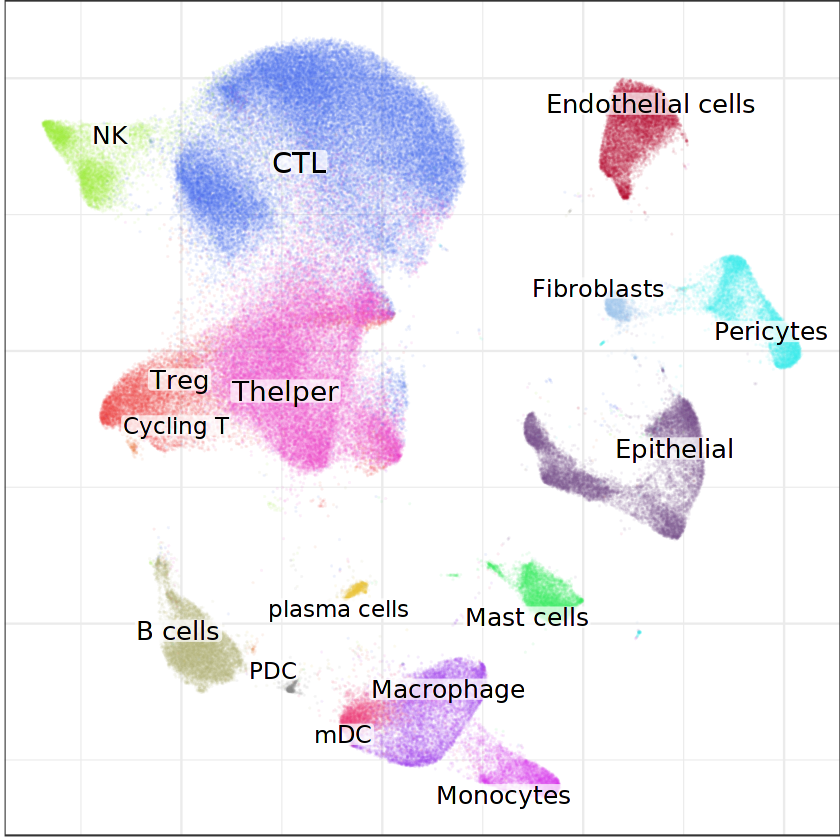

In [5]:
annot.palf2 <- function(n) return(annot.pal[1:n])

a1 <- scon$plotGraph(alpha=0.05,font.size = c(4.7,6),size=0.1, groups=scon$misc$cell.type, plot.na=F, mark.groups=T, palette=annot.palf2, raster=TRUE)
a1

In [6]:
annot = scon$misc$cell.type

ssamp=scon$getDatasetPerCell()
stype=Toch(ssamp)
stype[grepl('-N-',names(stype))]='Normal'
stype[grepl('-T-',names(stype))]='Tumor'
stype[grepl('HP|Healthy',names(stype))]='Healthy'



#table(ssamp[names(stype)])

stype=ordered(as.factor(stype),levels=c('Healthy','Normal','Tumor'))  

cname = names(annot)
cname = intersect(cname,names(ssamp))
ssamp = ssamp[cname]
stype = stype[cname]
annot = annot[cname]

sample.groups <- tapply(ssamp,stype,unique)
sample.groups <- as.factor(setNames(rep(names(sample.groups),unlist(lapply(sample.groups,length))),unlist(sample.groups)))

stype2=Toch(stype)
stype2[grepl('N-LG',names(stype2))]='N-LG'
stype2[grepl('T-LG',names(stype2))]='T-LG'

stype2[grepl('T-HG',names(stype2))]='T-HG'
stype2[grepl('N-HG',names(stype2))]='N-HG'
table(stype2)

stype2 = stype2[cname]


stype2=ordered(as.factor(stype2),levels=c('Healthy','N-LG','N-HG','T-LG','T-HG'))  

stype=stype[names(annot)]
stype2=stype2[names(annot)]

table(stype)
table(stype2)


stype2
Healthy    N-HG    N-LG    T-HG    T-LG 
  24825   21189   45270   28990   37550 

stype
Healthy  Normal   Tumor 
  24825   66459   66540 

stype2
Healthy    N-LG    N-HG    T-LG    T-HG 
  24825   45270   21189   37550   28990 

In [23]:

fraction.palette1=c('grey80' ,"#00FFFFFF","#FF0000FF")
fraction.palette2=c('grey80',"#064196", "#2a9606", "coral1", "#960d06" ) ##969606
names(fraction.palette1)=levels(stype)
names(fraction.palette2)=levels(stype2)
fraction.palette1
fraction.palette2



Healthy      Normal       Tumor 
   "grey80" "#00FFFFFF" "#FF0000FF"

Healthy      N-LG      N-HG      T-LG      T-HG 
 "grey80" "#064196" "#2a9606"  "coral1" "#960d06"

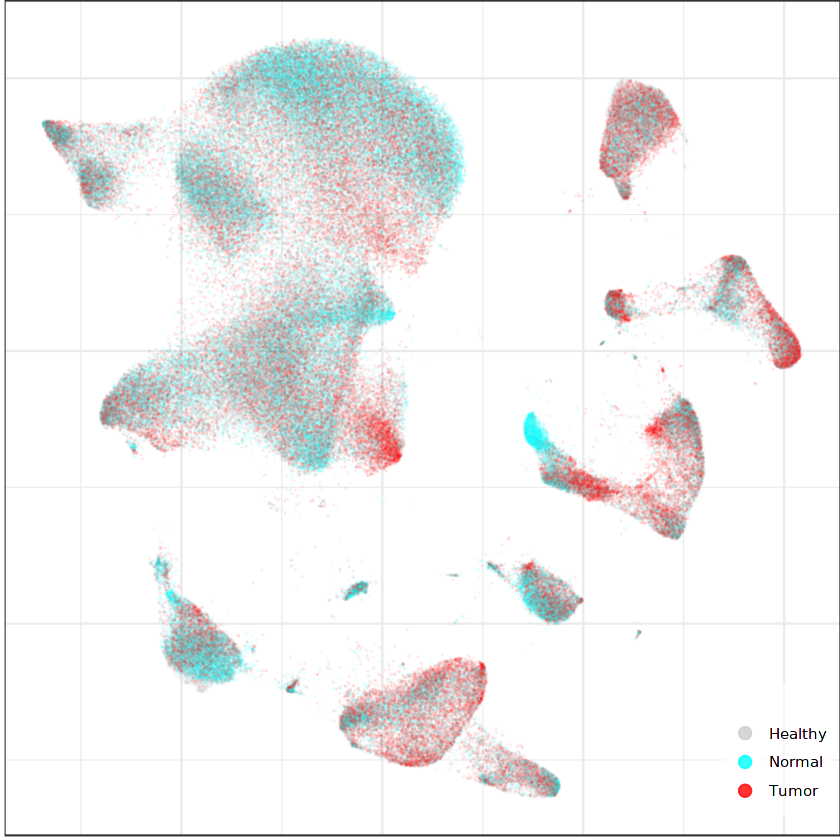

In [7]:
fraction.palette1f = function(n) return(fraction.palette1[1:n])

p4 <- scon$plotGraph(groups=stype,plot.na=F,alpha=0.05,size=0.1,mark.groups=F, show.legend=T,raster =TRUE, 
                     legend.position=c(0.99, 0.03),palette=fraction.palette1f) +
  guides(color=guide_legend(override.aes = list(size=3,alpha=0.8),title=''))

p4

ggsave('S1.frac.pdf',p4,width = 4,height=4)


In [8]:
sample.groups2 <- tapply(ssamp[names(stype2)],stype2,unique)
sample.groups2 <- as.factor(setNames(rep(names(sample.groups2),unlist(lapply(sample.groups2,length))),unlist(sample.groups2)))


Using SampleType as value column: use value.var to override.



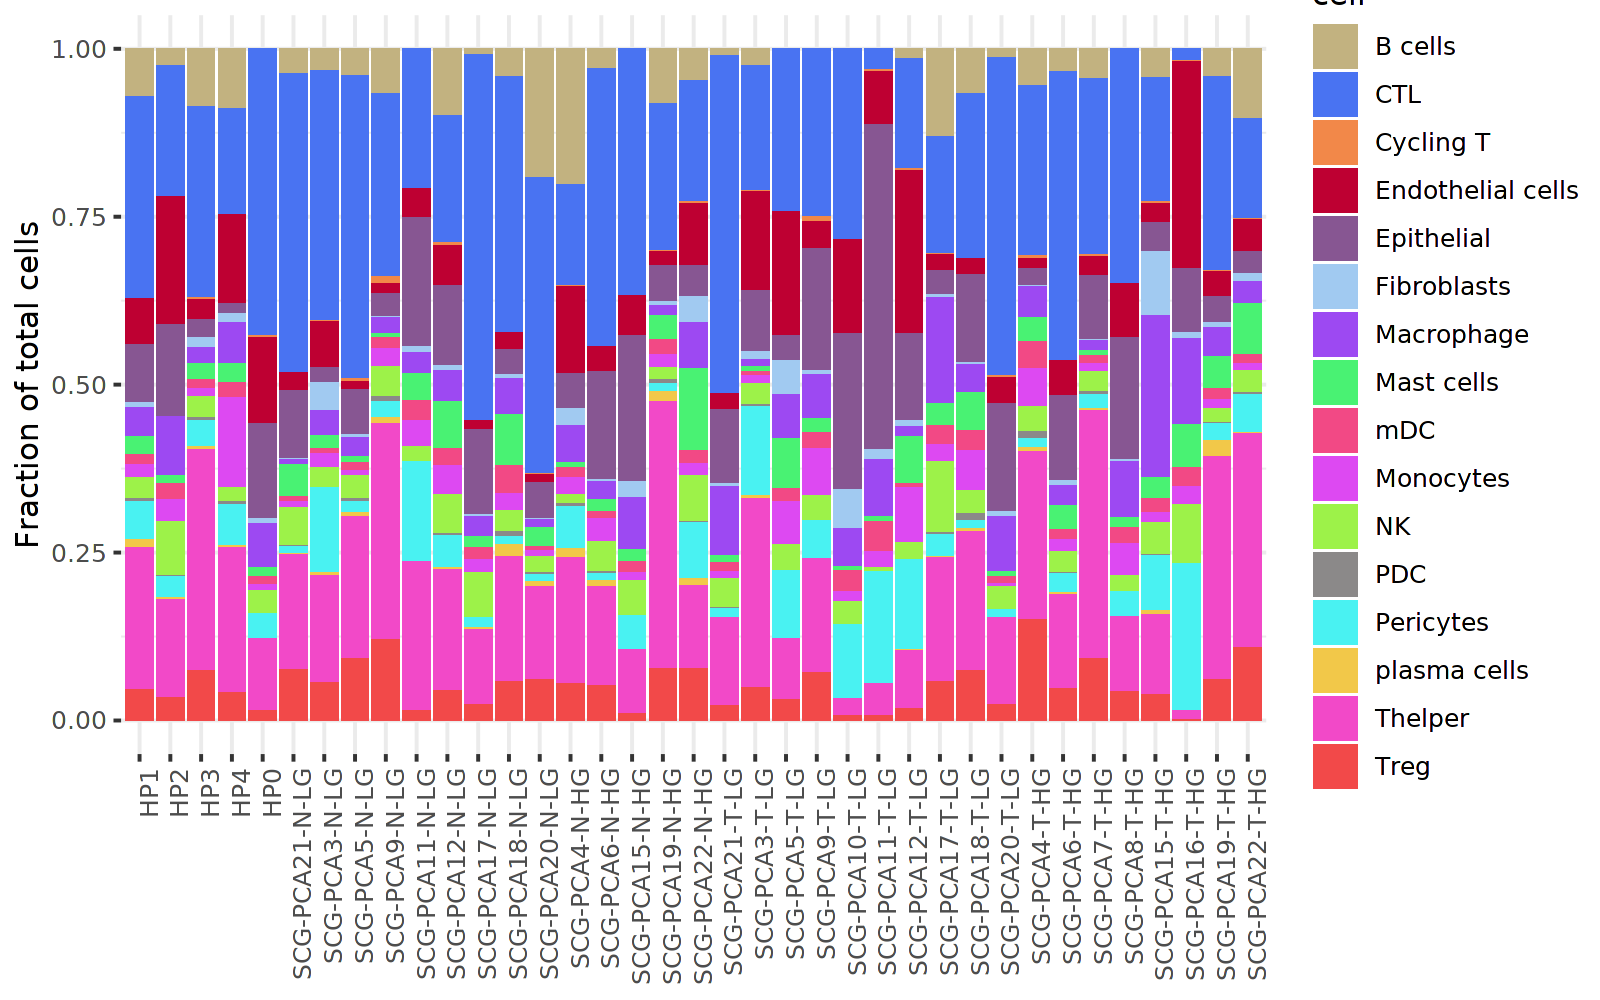

In [10]:
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 200)



n1=sample.groups2[sample.groups2=='Healthy'] %>% names
n2=sample.groups2[sample.groups2=='N-LG'] %>% names
n3=sample.groups2[sample.groups2=='N-HG'] %>% names
n4=sample.groups2[sample.groups2=='T-LG'] %>% names
n5=sample.groups2[sample.groups2=='T-HG'] %>% names

cname=names(annot)
#cname = cname[!grepl('Normal',cname)]
library(reshape2)


ssamp = ordered(as.factor(ssamp),levels =c(n1,n2,n3,n4,n5))

ano2=data.frame('Cell'=annot[cname],'SampleType'=ssamp[cname])

# Annotation vs sample
tmp2 <- acast(ano2, Cell ~ SampleType, fun.aggregate=length)


#head(tmp2)
# Normalise for the number of cells in each library
tmp3 <- (sweep(tmp2, 2, colSums(tmp2), FUN='/'))
tmp4 <- melt(tmp3)
#head(tmp4)
names(tmp4) <- c('cell', 'sample','pc.of.sample')
#head(tmp4)


p=ggplot(tmp4, aes(x=sample, fill=cell, y = pc.of.sample)) +theme_bw()+
  geom_bar(stat='identity', position='fill') +
  scale_fill_manual(values=annot.pal[levels(annot)])+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
       panel.border = element_blank(),
        axis.title.x=element_blank(),legend.position = 'right')+ylab('Fraction of total cells')

p




In [13]:
allp2=readRDS('/home/meisl/Workplace/Prostate/healty.data/conos/join.all.Sept.p2Object.rds')


[1] "blue"
[1] "white"
[1] "red"


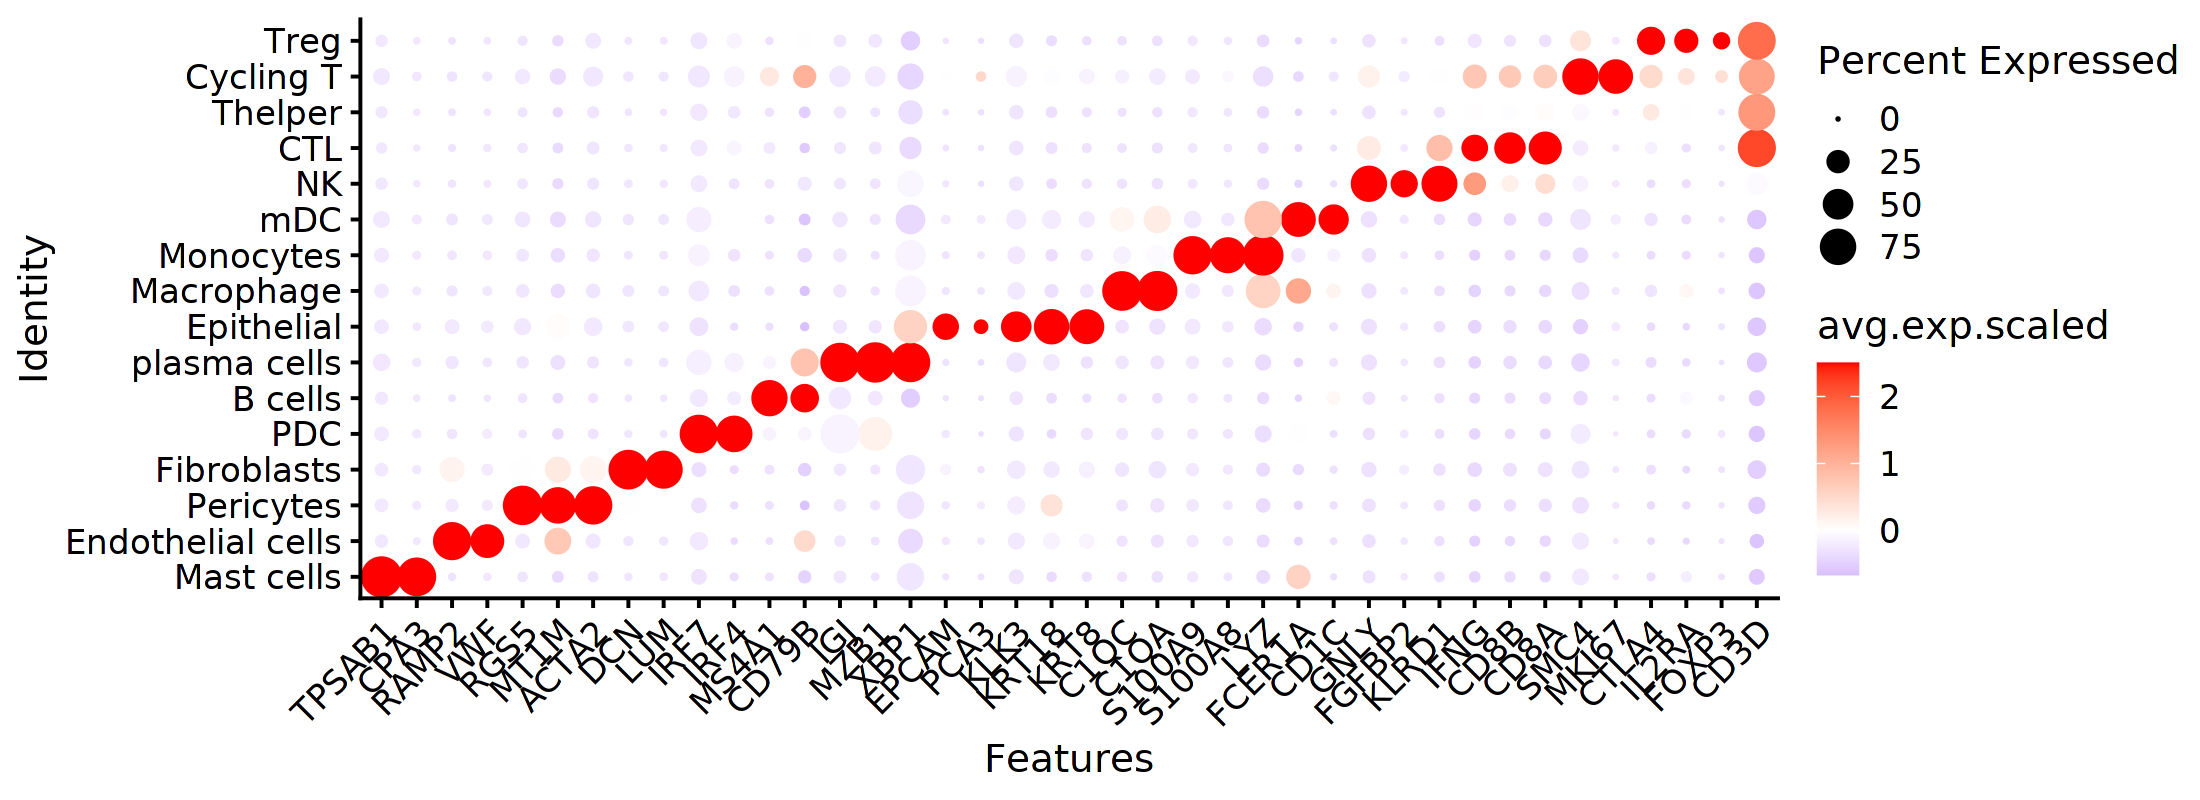

In [18]:
options(repr.plot.width = 11, repr.plot.height = 4, repr.plot.res = 200)

library(cowplot)

gs=c('CD3D','FOXP3','IL2RA','CTLA4','MKI67','SMC4','CD8A','CD8B','IFNG','KLRD1','FGFBP2','GNLY','CD1C','FCER1A','LYZ','S100A8','S100A9','C1QA','C1QC','KRT8','KRT18','KLK3','PCA3','EPCAM','XBP1','MZB1','IGJ','CD79B','MS4A1','IRF4','IRF7','LUM','DCN','ACTA2','MT1M','RGS5','VWF','RAMP2','CPA3','TPSAB1')


annot2=annot
levels=c("Mast cells"      ,  "Endothelial cells", "Pericytes"    ,     "Fibroblasts"      ,
           "PDC"  ,    "B cells"     ,     "plasma cells"   ,   "Epithelial"  ,      
 "Macrophage"  ,      "Monocytes"  ,       "mDC"   ,            "NK"  ,             
      "CTL"       ,    "Thelper"  ,       "Cycling T"   ,              
 "Treg"  )

annot2=ordered(as.factor(annot2),levels=levels)

source('/d0-mendel/home/meisl/bin/FunctionLib/Lib/ploty.Dotplot2.r')
cname=names(annot2)
aexp=t(allp2$counts)
cname = intersect(cname,colnames(aexp))

gs=intersect(gs,rownames(aexp))
#cname=intersect(cname,colnames(aexp))
p=Dotfig(gs,aexp[,cname],annot2[cname],cols = c("blue","white", "red"))
p

Using SampleType as value column: use value.var to override.



,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Mast cells,HP1,0.026760954
2,Endothelial cells,HP1,0.067526345
3,Pericytes,HP1,0.056988353
4,Fibroblasts,HP1,0.007071547
5,PDC,HP1,0.004575707
6,B cells,HP1,0.070854132


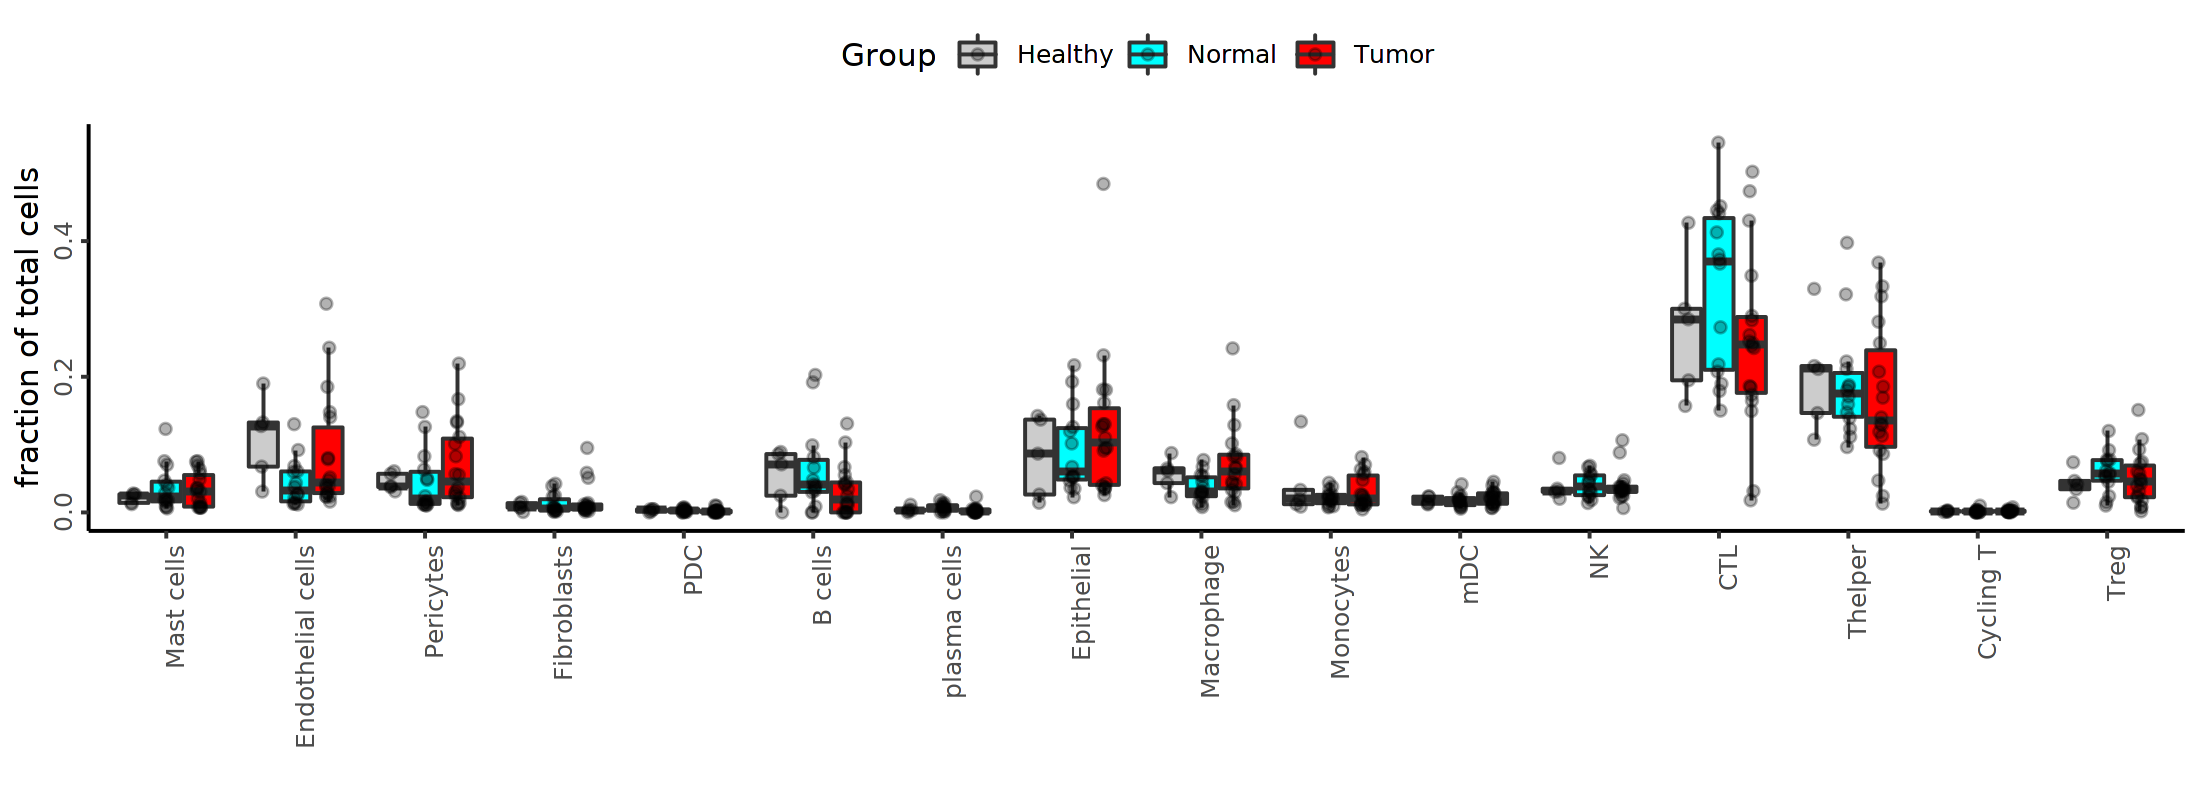

In [21]:

cname=names(annot2)
ano2=data.frame('Cell'=annot2[cname],'SampleType'=ssamp[cname])

# Annotation vs sample
tmp2 <- acast(ano2, Cell ~ SampleType, fun.aggregate=length)
tmp3 <- (sweep(tmp2, 2, colSums(tmp2), FUN='/'))
tmp4 <- melt(tmp3)
head(tmp4)
names(tmp4) <- c('cell', 'sample','pc.of.sample')

tmp4$Group=NULL
tmp4$Group=sample.groups[as.character(tmp4$sample)]


p <- ggplot(na.omit(tmp4),aes(x=cell,y=pc.of.sample,dodge=Group,fill=Group))+geom_boxplot(notch=FALSE,outlier.shape=NA)  +  geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19)+theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab("fraction of total cells")+theme(legend.position="top")+
  scale_fill_manual(values=fraction.palette1)
p

#ggsave('F1.proportion1.pdf',p,height=4.3,width=5.6)

df=tmp4
rsig=NULL
for (i in unique(df[,1])){
  tmp=df[df[,1]==i,]

  sig=compare_means(pc.of.sample ~ Group,  data = tmp) # 
  sig$cell=i
  rsig=rbind(rsig,sig)
  #sig[sig$p.signif!='ns',]
}

write.table(rsig,'F1.proportion1.pvalue.xls',sep='\t',col.names=T,row.names=F,quote=F)


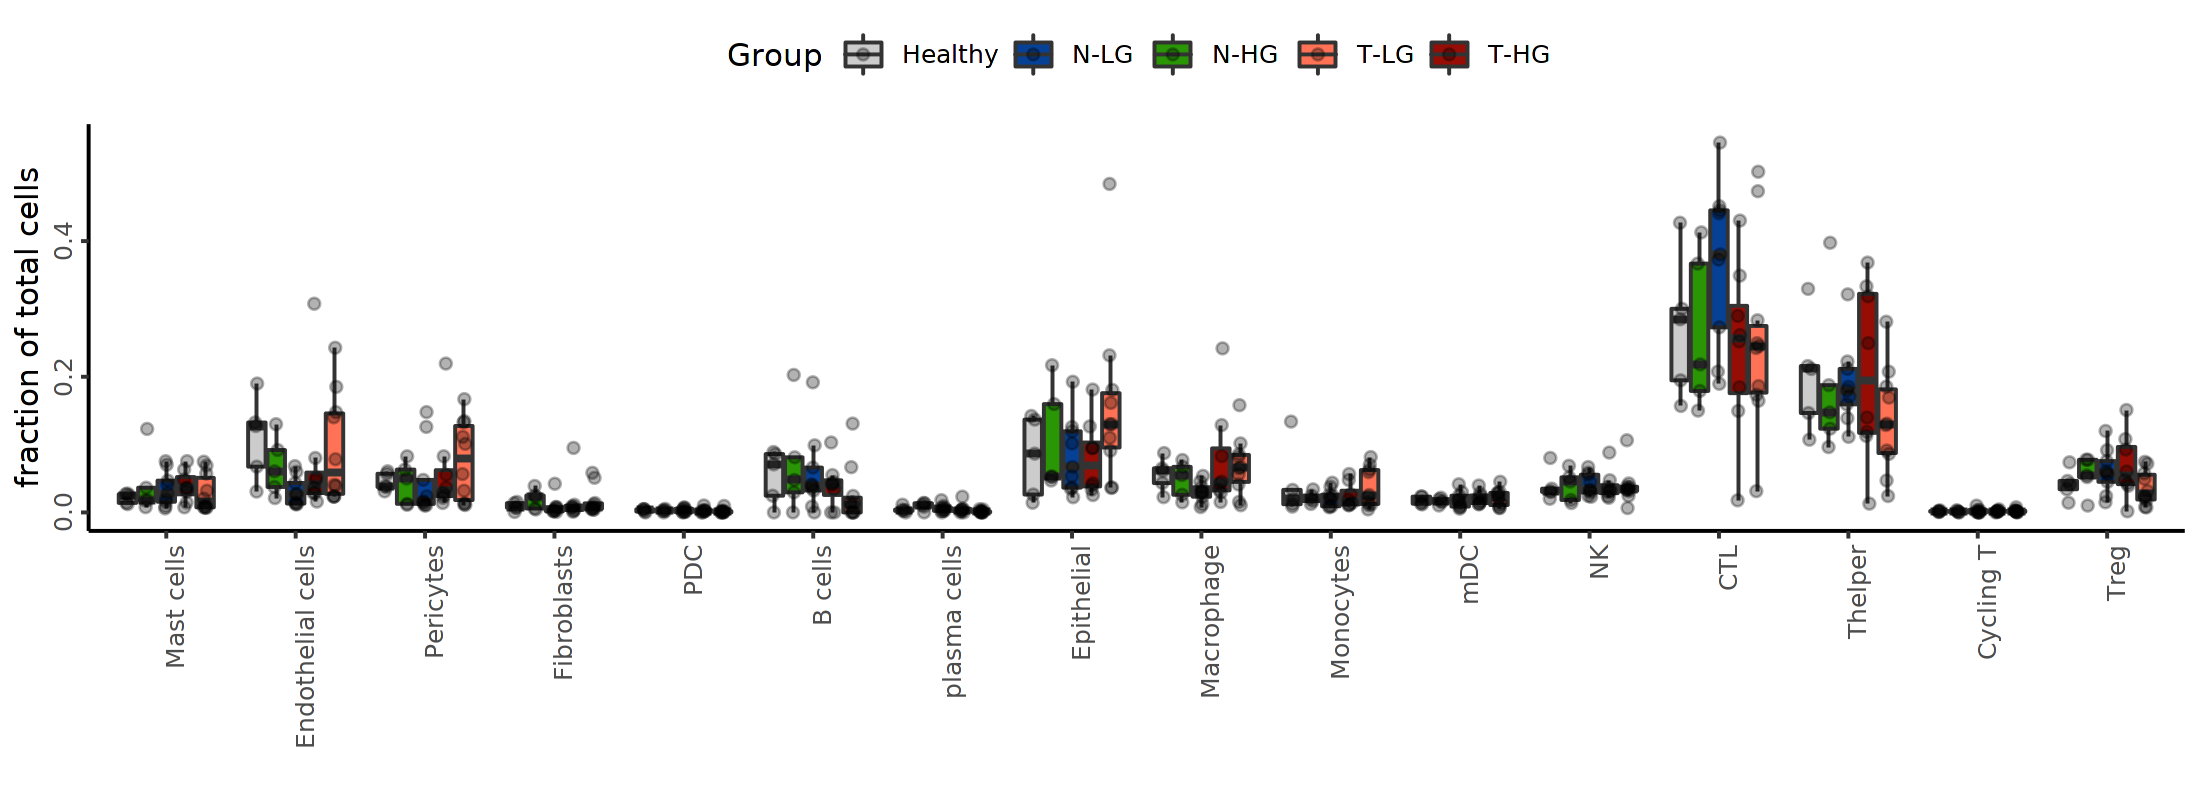

In [25]:
tmp4$Group=NULL

tmp4$Group=sample.groups2[as.character(tmp4$sample)]

p <- ggplot(na.omit(tmp4),aes(x=cell,y=pc.of.sample,dodge=Group,fill=Group))+geom_boxplot(notch=FALSE,outlier.shape=NA)  +  geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19)+theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab("fraction of total cells")+theme(legend.position="top")+
  scale_fill_manual(values=fraction.palette2)
p


df=tmp4
rsig=NULL
for (i in unique(df[,1])){
  tmp=df[df[,1]==i,]

  sig=compare_means(pc.of.sample ~ Group,  data = tmp) # 
  sig$cell=i
  rsig=rbind(rsig,sig)
  #sig[sig$p.signif!='ns',]
}

write.table(rsig,'F1.proportion1.pvalue.xls',sep='\t',col.names=T,row.names=F,quote=F)

#ggsave('F1.proportion2.pdf',p,height=4.3,width=7.2)

In [27]:
typef=annot2


In [30]:
#typef=typef[!grepl('Hea',names(typef))]
samplef=Toch(ssamp[names(typef)])
tab=table(typef,samplef)


In [34]:

getClusterCountMatrices2<-function (ss,clustering = NULL, groups = NULL, common.genes = TRUE, 
          omit.na.cells = TRUE) 
{

  groups <- as.factor(groups)
  matl <- lapply(ss, function(s) {
    m <- conos:::getRawCountMatrix(s, trans = TRUE)
    cl <- factor(groups[match(rownames(m), names(groups))], 
                 levels = levels(groups))
    tc <- sccore:::colSumByFactor(m, cl)
    if (omit.na.cells) {
      tc <- tc[-1, , drop = F]
    }
    t(tc)
  })
  if (common.genes) {
    gs <- unique(unlist(lapply(matl, rownames)))
    matl <- lapply(matl, function(m) {
      nm <- matrix(0, nrow = length(gs), ncol = ncol(m))
      colnames(nm) <- colnames(m)
      rownames(nm) <- gs
      mi <- match(rownames(m), gs)
      nm[mi, ] <- m
      nm
    })
  }
  matl
}


In [35]:
cm <- getClusterCountMatrices2(scon$samples[unique(samplef)],groups=typef)


In [37]:

cct <- table(typef,samplef)
ctdm <- lapply(sn(colnames(cm[[1]])),function(ct) {
  tcm <- do.call(rbind,lapply(cm,function(x) x[,ct]))
  tcm <- t(tcm/pmax(1,rowSums(tcm)))
  tcd <- sccore:::jsDist(tcm); dimnames(tcd) <- list(colnames(tcm),colnames(tcm));
  # calculate how many cells there are
  attr(tcd,'cc') <- cct[ct,colnames(tcm)]
  tcd
})


In [42]:
min.cells=10
  xlist <- lapply(sn(names(ctdm)),function(ct) {
    #print(ct)
    xd <- ctdm[[ct]]
    nc <- attr(ctdm[[ct]],'cc');
    vi <- nc[rownames(xd)]>=min.cells;
    xd <- xd[vi,vi]
    xd
  })


library(abind)

# a cube across all cell types and sample pairs
# weights of individual cell types determined by the minimal number of cells on each side of the pairwise comparison
x <- abind(lapply(ctdm,function(x) {
  nc <- attr(x,'cc');
  #wm <- (outer(nc,nc,FUN='pmin'))
  wm <- sqrt(outer(nc,nc,FUN='pmin'))
  return( x*wm )
}),along=3)
# just the weights (for total sum of weights normalization)
y <- abind(lapply(ctdm,function(x) {
  nc <- attr(x,'cc');
  sqrt(outer(nc,nc,FUN='pmin'))
}),along=3)

# normalize by total weight sums
xd <- apply(x,c(1,2),sum)/apply(y,c(1,2),sum)


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
notch went outside hinges. Try setting notch=FALSE.



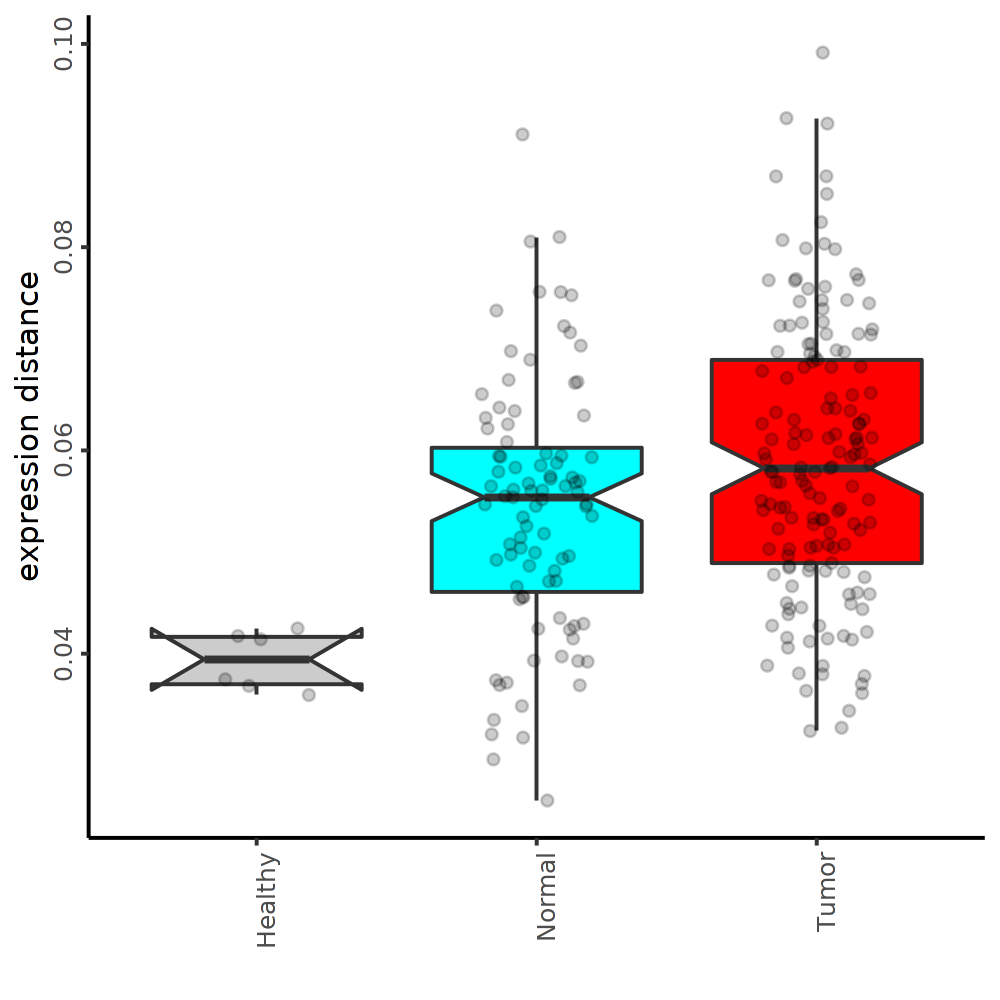

In [43]:
x <- xd; x[upper.tri(x)] <- NA; diag(x) <- NA;

# distance magnitude comparisons
# first, on combined distance matrix
df2 <- na.omit(melt(x))

df2$patient1 <- df2$Var1
df2$patient2 <- df2$Var2


df2$fraction1 <-sample.groups[as.character(df2$Var1)]
df2$fraction2 <- sample.groups[as.character(df2$Var2)]

df2$samePatient <- df2$patient1==df2$patient2;
df2$sameFraction <- df2$fraction1==df2$fraction2;


df2$type <- NA
df2$type[df2$sameFraction & df2$fraction1=='Healthy'] <- 'Healthy'
df2$type[df2$sameFraction & df2$fraction1=='Normal'] <- 'Normal'
df2$type[df2$sameFraction & df2$fraction1=='Tumor'] <- 'Tumor'


p <- ggplot(na.omit(df2),aes(x=type,y=value))+geom_boxplot(notch=TRUE,outlier.shape=NA,aes(fill=type))+geom_jitter(position=position_jitter(0.2),color=adjustcolor('black',alpha=0.2))+theme_classic()+ theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5)) +  guides(fill=FALSE) + xlab('') + ylab('expression distance')+
  scale_fill_manual(values=fraction.palette1)
p